In [2]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


170500096/170498071 [==============================] - 207s 1us/step


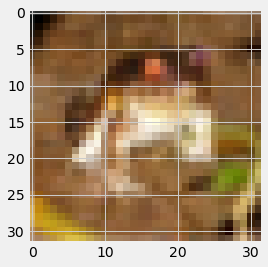

In [4]:
img=plt.imshow(x_train[0])

In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
classification[y_train[0][0]]

'frog'

In [12]:
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [13]:
x_train=x_train/255
x_test=x_test/255

In [14]:
model=Sequential()

model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1000,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(500,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(250,activation='relu'))

model.add(Dense(10,activation='softmax'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
hist=model.fit(x_train,y_train_one_hot,batch_size=256,epochs=10,
              validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.7822 - acc: 0.3338 - val_loss: 1.5701 - val_acc: 0.4238
Epoch 2/10
40000/40000 [==============================] - 41s 1ms/sample - loss: 1.4169 - acc: 0.4793 - val_loss: 1.2894 - val_acc: 0.5358
Epoch 3/10
40000/40000 [==============================] - 42s 1ms/sample - loss: 1.2769 - acc: 0.5373 - val_loss: 1.1920 - val_acc: 0.5746
Epoch 4/10
40000/40000 [==============================] - 41s 1ms/sample - loss: 1.1711 - acc: 0.5813 - val_loss: 1.1316 - val_acc: 0.5951
Epoch 5/10
40000/40000 [==============================] - 42s 1ms/sample - loss: 1.0907 - acc: 0.6112 - val_loss: 1.0838 - val_acc: 0.6116
Epoch 6/10
40000/40000 [==============================] - 42s 1ms/sample - loss: 1.0310 - acc: 0.6327 - val_loss: 1.1296 - val_acc: 0.6049
Epoch 7/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 0.9620 - acc: 0.6608 - val_loss: 1.

In [17]:
model.evaluate(x_test,y_test_one_hot)[1]

10000/10000 [==============================] - 2s 228us/sample - loss: 0.9407 - acc: 0.6685


0.6685

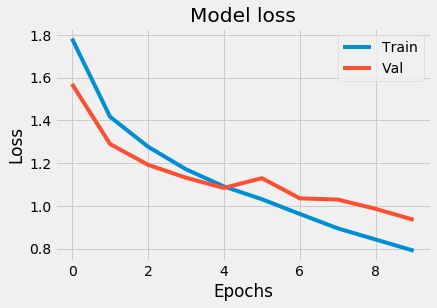

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [49]:
new_img=plt.imread('WhatsApp_Image_2020-07-11_at_4.01.28_AM-removebg-preview.png')

In [50]:
new_img

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.      

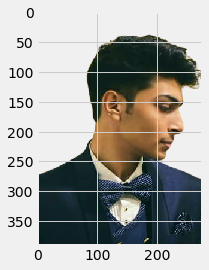

In [51]:
img=plt.imshow(new_img)

In [52]:
from skimage.transform import resize

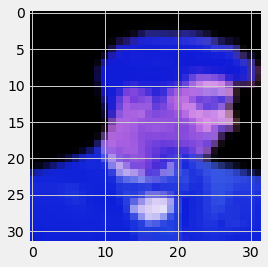

In [53]:
resized_img=resize(new_img,(32,32,3))
img=plt.imshow(resized_img)

In [54]:
predictions=model.predict(np.array([resized_img]))
predictions

array([[0.3767316 , 0.00685271, 0.04574294, 0.25380188, 0.00648616,
        0.06679848, 0.00401263, 0.02615477, 0.20620148, 0.00721727]],
      dtype=float32)

In [55]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions

for i in range (10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
            
print(list_index)
            


[0, 3, 8, 5, 2, 7, 9, 1, 4, 6]


In [56]:
for i in range(5):
    print(classification[list_index[i]],':'
         ,round(predictions[0][list_index[i]]*100,2),'%')

airplane : 37.67 %
cat : 25.38 %
ship : 20.62 %
dog : 6.68 %
bird : 4.57 %
